# QUICK RECAP
   
    Nella scorsa lezione abbiamo visto:
    - Come creare un plot Bar e un plot Pie con un dataframe Pandas
    - Come aggregare i dati: le tabelle Pivot e gli indici multipli
    - Come creare un istogramma
    - Come definire una metrica aggregando colonne del dataframe in una nuova colonna
    - Un esercizio di data analysis su un dataset reale (dataset calciatori)


# Introduciamo ora una libreria per la visualizzazione (plotting) dei dati: MATPLOTLIB

In [2]:
import matplotlib.pyplot as plt
# utilizziamo uno stile particolare
plt.style.use('seaborn-whitegrid')


/tmp/ipykernel_19751/3915274068.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


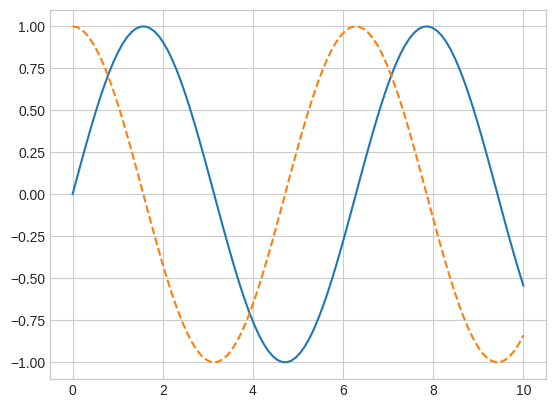

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()   # con questo comando creiamo il container dentro il quale disegnare qualcosa

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

In [4]:
# salviamo la figura su un file
fig.savefig('my_figure.png')

In [7]:
!ls -lh my_figure.png

-rw-rw-r-- 1 giando giando 39K mar 15 21:30 my_figure.png


In [8]:
!pwd

/home/giando/p3/1-work/Artificial-Intelligence-with-Python


Possiamo anche importare un'immagine

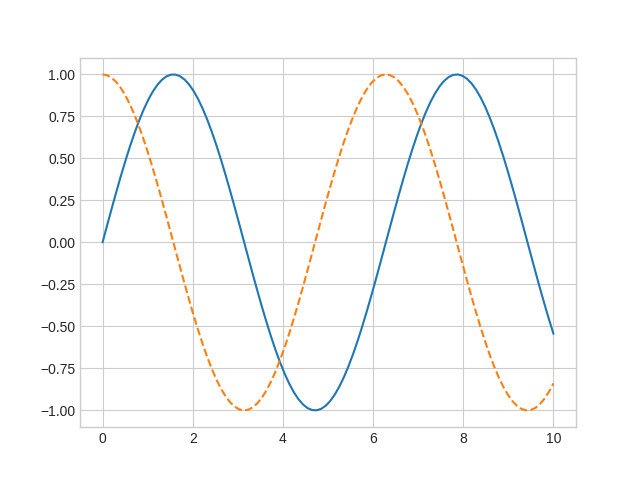

In [26]:
from IPython.display import Image
Image('my_figure.png')

Possiamo utilizzare diversi colori

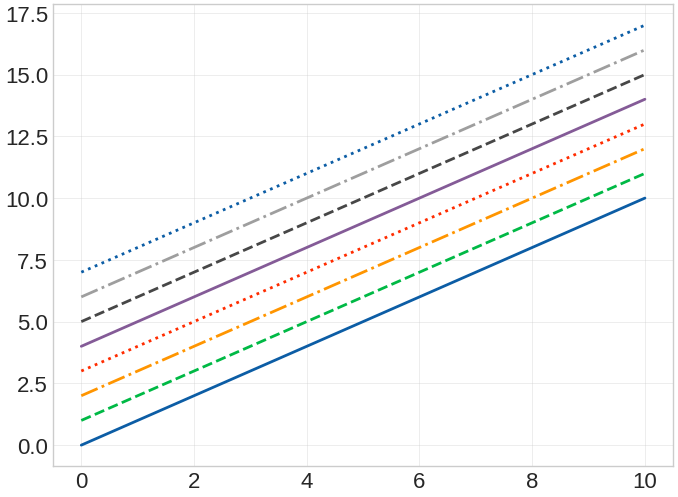

In [28]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

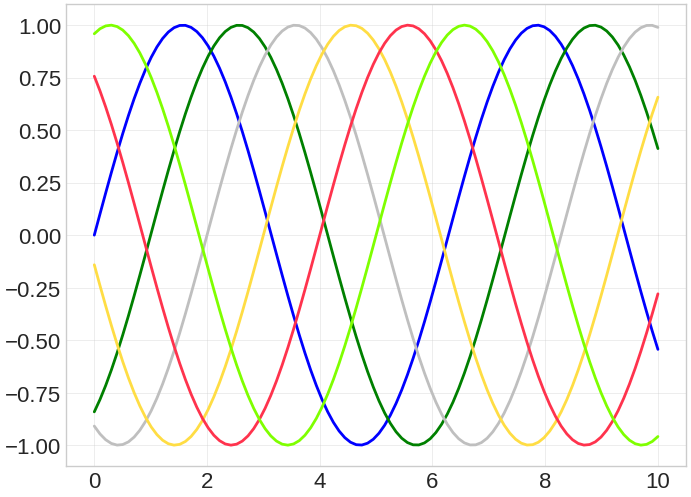

In [29]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Oppure combinarli

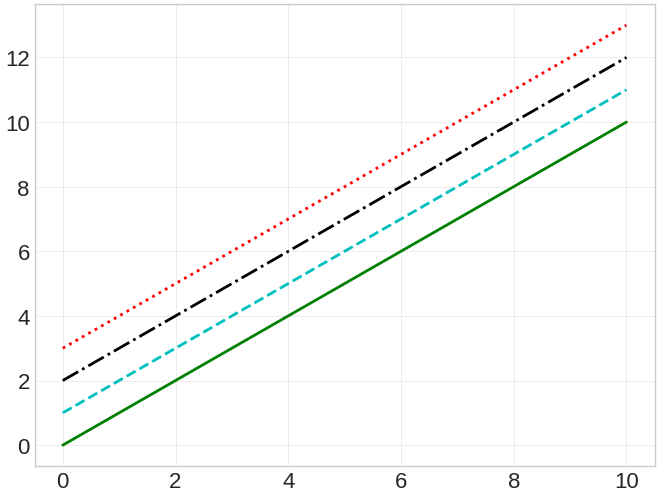

In [30]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

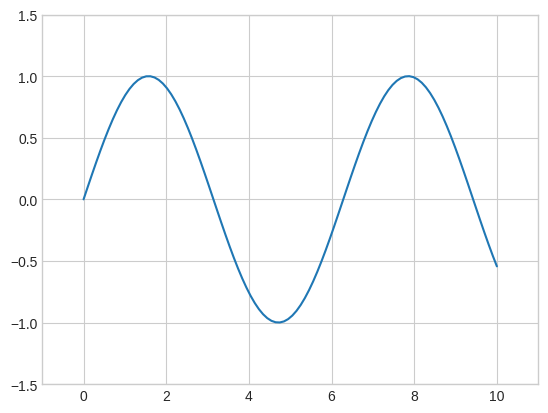

In [13]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Un altro utile metodo è ``plt.axis()`` (fare attenzione alla possibile confusione tra *axes* con una *e*, e *axis* con una *i*).
Il metodo ``plt.axis()`` consente di impostare i limiti ``x`` e ``y`` con una singola chiamata, passando una lista che specifica ``[xmin, xmax, ymin, ymax] ``:

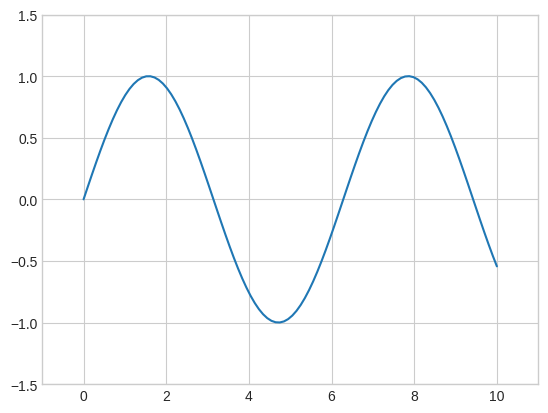

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

Vediamo come plottare le informazioni sugli assi cartesiani

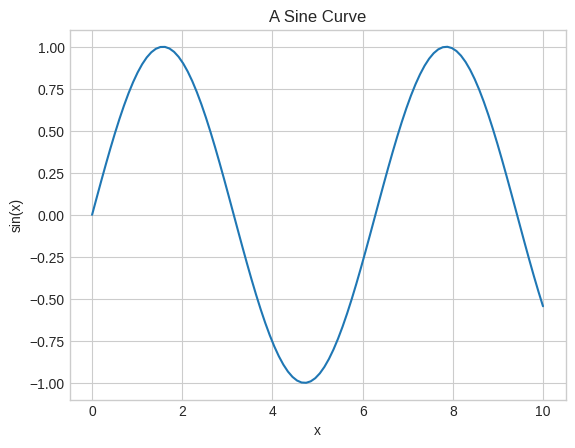

In [15]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

Quando vengono visualizzate più linee, può essere utile creare una legenda del grafico che etichetti ciascun tipo di linea.
Ancora una volta, Matplotlib ha un modo integrato per creare rapidamente una tale legenda.
È fatto tramite il metodo ``plt.legend()``.
Sebbene ci siano diversi modi validi per usarlo, trovo più semplice specificare l'etichetta di ogni riga usando la parola chiave ``label`` della funzione plot:

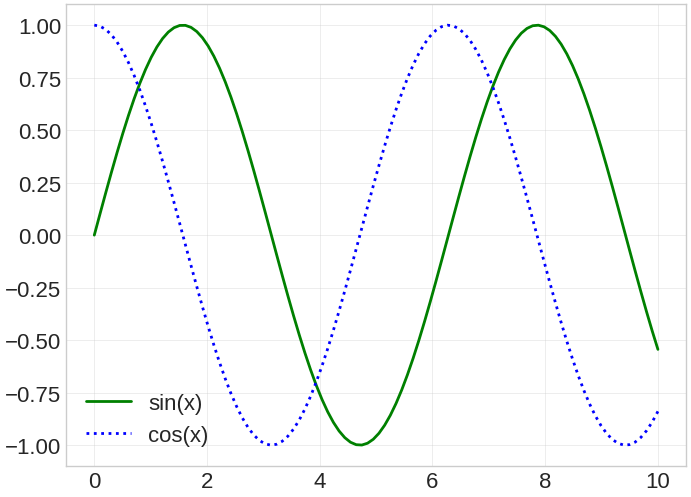

In [34]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.legend();
#plt.legend(loc='lower right', fontsize=12)

# ORA PROVA TU

-Prova a fare delle modifiche ai comandi sopra per capire come cambiare gli attributi dei grafici

# Vediamo qualche altro esempio

In [35]:
plt.style.use(['science', 'notebook', 'grid'])

In [18]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

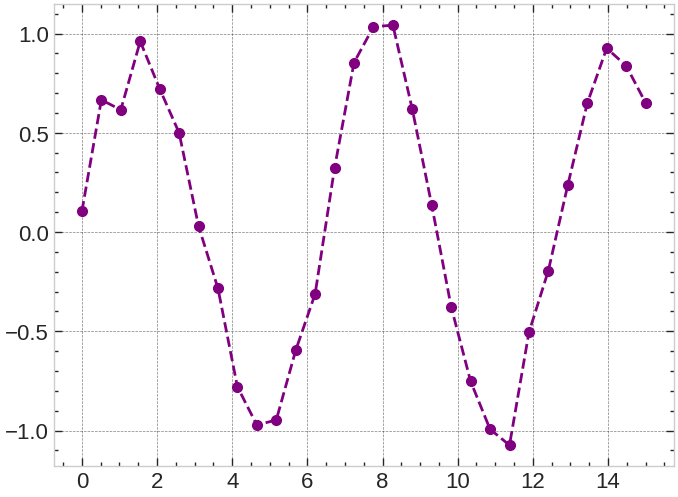

In [19]:
plt.plot(x,y, 'o--', color='purple', lw=2, ms=7)

Figure size

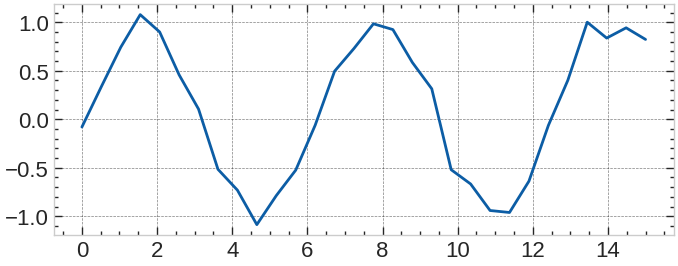

In [57]:
# riduciamo la dimensione delle immagini
plt.figure(figsize=(8,3))
plt.plot(x,y)

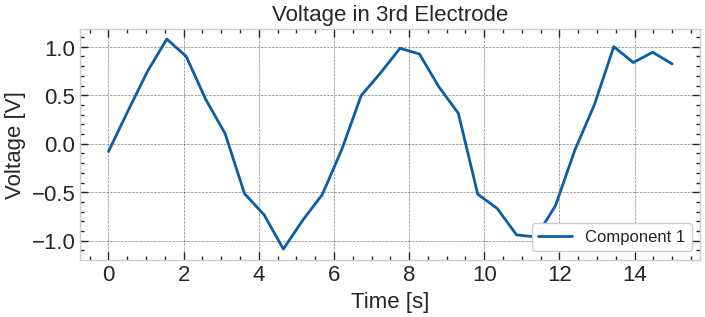

In [59]:
plt.figure(figsize=(8,3))
plt.plot(x,y, label='Component 1')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=12)
plt.show()

# Proviamo a plottare qualche dato reale

In [36]:
import pandas as pd

In [37]:
#url_quantity = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Europe_Quantity.csv'
#export_quantity = pd.read_csv(url)
url_value = 'https://raw.githubusercontent.com/giandopal/Artificial-Intelligence-with-Python/main/data/Europe_Value.csv'
export_value=pd.read_csv(url_value)

In [39]:
export_value

Land Area Trade flow    Commodity     2000 S_2000     2001 S_2001  \
0           Albania     Export  Crustaceans       29    NaN      354    NaN   
1           Albania     Export         Fish     4387    NaN     5990    NaN   
2           Albania     Import  Crustaceans       15    NaN       13    NaN   
3           Albania     Import         Fish     4075    NaN     5173    NaN   
4           Andorra     Export  Crustaceans        0      -        0      -   
..              ...        ...          ...      ...    ...      ...    ...   
163         Ukraine     Import         Fish   109510    NaN    95572    NaN   
164  United Kingdom     Export  Crustaceans   343852    NaN   334171    NaN   
165  United Kingdom     Export         Fish   776742    NaN   833689    NaN   
166  United Kingdom     Import  Crustaceans   589457    NaN   549562    NaN   
167  United Kingdom     Import         Fish  1412679    NaN  1485684    NaN   

        2002 S_2002     2003  ...     2011  S_2011     2012  S_2012     2013  \
0         20    NaN       58  ...      961     NaN      829     NaN       78   
1       8329      F    13379  ...    31189     NaN    31096     NaN    34891   
2         19    NaN       28  ...     2803     NaN     2308     NaN     1980   
3       9605    NaN    11092  ...    25958     NaN    22004     NaN    27862   
4          0      -        0  ...        1     NaN        0       -        0   
..       ...    ...      ...  ...      ...     ...      ...     ...      ...   
163    86154    NaN   105383  ...   548088     NaN   737505     NaN   911156   
164   366729    NaN   395928  ...   474333     NaN   438557     NaN   455294   
165   847804    NaN  1073843  ...  1917637     NaN  1758354     NaN  1862348   
166   543235    NaN   624542  ...   900722     NaN   876514     NaN   975565   
167  1571775    NaN  1655944  ...  3040647     NaN  3079108     NaN  3230800   

     S_2013     2014  S_2014     2015  S_2015  
0       NaN      947       F     1453     NaN  
1       NaN    32499     NaN    33989     NaN  
2       NaN     3203       F     3583     NaN  
3       NaN    28940       F    30991     NaN  
4         -        0       -        1     NaN  
..      ...      ...     ...      ...     ...  
163     NaN   629638     NaN   307708     NaN  
164     NaN   478204     NaN   395712     NaN  
165     NaN  2169639     NaN  1666646     NaN  
166     NaN  1081740     NaN  1005438     NaN  
167     NaN  3171716     NaN  2810551     NaN  

[168 rows x 35 columns]

In [40]:
export_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Land Area   168 non-null    object
 1   Trade flow  168 non-null    object
 2   Commodity   168 non-null    object
 3   2000        168 non-null    int64 
 4   S_2000      18 non-null     object
 5   2001        168 non-null    int64 
 6   S_2001      18 non-null     object
 7   2002        168 non-null    int64 
 8   S_2002      22 non-null     object
 9   2003        168 non-null    int64 
 10  S_2003      21 non-null     object
 11  2004        168 non-null    int64 
 12  S_2004      15 non-null     object
 13  2005        168 non-null    int64 
 14  S_2005      16 non-null     object
 15  2006        168 non-null    int64 
 16  S_2006      10 non-null     object
 17  2007        168 non-null    int64 
 18  S_2007      11 non-null     object
 19  2008        168 non-null    int64 
 20  S_2008    

In [41]:
export_value=export_value.dropna(axis=1)

In [43]:
export_value

Land Area Trade flow    Commodity     2000     2001     2002  \
0           Albania     Export  Crustaceans       29      354       20   
1           Albania     Export         Fish     4387     5990     8329   
2           Albania     Import  Crustaceans       15       13       19   
3           Albania     Import         Fish     4075     5173     9605   
4           Andorra     Export  Crustaceans        0        0        0   
..              ...        ...          ...      ...      ...      ...   
163         Ukraine     Import         Fish   109510    95572    86154   
164  United Kingdom     Export  Crustaceans   343852   334171   366729   
165  United Kingdom     Export         Fish   776742   833689   847804   
166  United Kingdom     Import  Crustaceans   589457   549562   543235   
167  United Kingdom     Import         Fish  1412679  1485684  1571775   

        2003     2004     2005     2006     2007     2008     2009     2010  \
0         58        6        1       32       33        1     1030      554   
1      13379    16896     1631     1671     1809     2254    28967    30514   
2         28       18       78      512      615     1351     1171     1625   
3      11092    13275    14957    15141    15953    22370    24095    22892   
4          0        0        5        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
163   105383   129713   261145   420617   492086   671451   504067   416555   
164   395928   432976   454670   488186   565349   479100   405784   454797   
165  1073843  1141685  1178785  1206945  1351393  1366370  1436082  1630259   
166   624542   662773   689453   699096   732596   697896   686534   730006   
167  1655944  1920262  2252187  2742357  3137610  3260124  2613149  2668313   

        2011     2012     2013     2014     2015  
0        961      829       78      947     1453  
1      31189    31096    34891    32499    33989  
2       2803     2308     1980     3203     3583  
3      25958    22004    27862    28940    30991  
4          1        0        0        0        1  
..       ...      ...      ...      ...      ...  
163   548088   737505   911156   629638   307708  
164   474333   438557   455294   478204   395712  
165  1917637  1758354  1862348  2169639  1666646  
166   900722   876514   975565  1081740  1005438  
167  3040647  3079108  3230800  3171716  2810551  

[168 rows x 19 columns]

In [44]:
filter_italy=export_value['Land Area']=='Italy'
export_italy=export_value[filter_italy]
export_italy

Land Area Trade flow    Commodity     2000     2001     2002     2003  \
76     Italy     Export  Crustaceans    32857    33963    41369    42043   
77     Italy     Export         Fish   243086   238942   271841   288845   
78     Italy     Import  Crustaceans   508682   528866   479852   636759   
79     Italy     Import         Fish  1531339  1631517  1742426  2126684   

       2004     2005     2006     2007     2008     2009     2010     2011  \
76    49063    51022    62375    55186    51387    43694    52168    55297   
77   345012   399202   471950   507976   534506   477600   454543   495997   
78   651564   706875   840311   841441   865639   759046   828401   897523   
79  2397132  2592451  2868366  3168160  3407872  3270821  3354821  3784930   

       2012     2013     2014     2015  
76    41539    48603    49707    44902  
77   445884   515557   547785   505000  
78   746400   806064   945890   803906  
79  3480487  3706800  3807179  3438559

In [45]:
exp_fish = export_italy.iloc[1,3:].values
exp_crustaceans=export_italy.iloc[0,3:].values

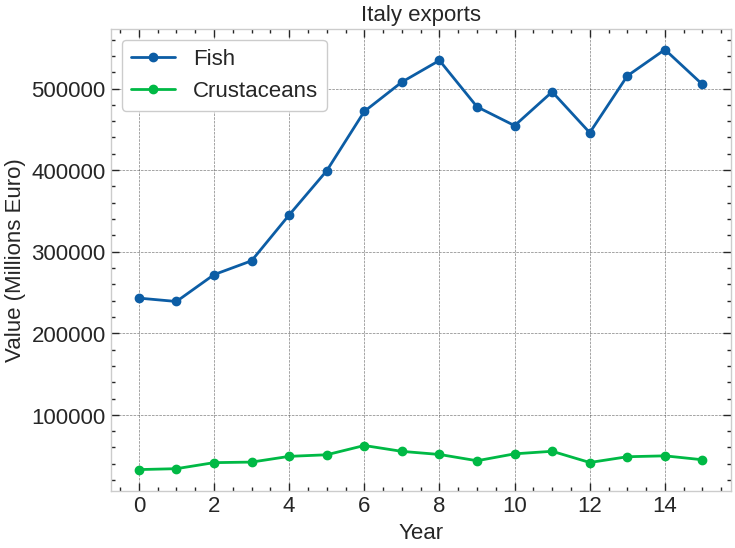

In [46]:
plt.title('Italy exports')
plt.xlabel('Year')
plt.ylabel('Value (Millions Euro)')
plt.plot(exp_fish, 'o-', label='Fish')
plt.plot(exp_crustaceans, 'o-', label='Crustaceans')
plt.legend()

Come faccio a sistemare l'ascissa? Creo ad hoc una lista di anni

In [47]:
num_value = exp_fish.shape[0]
years = np.arange(2000,2000+num_value)

In [107]:
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

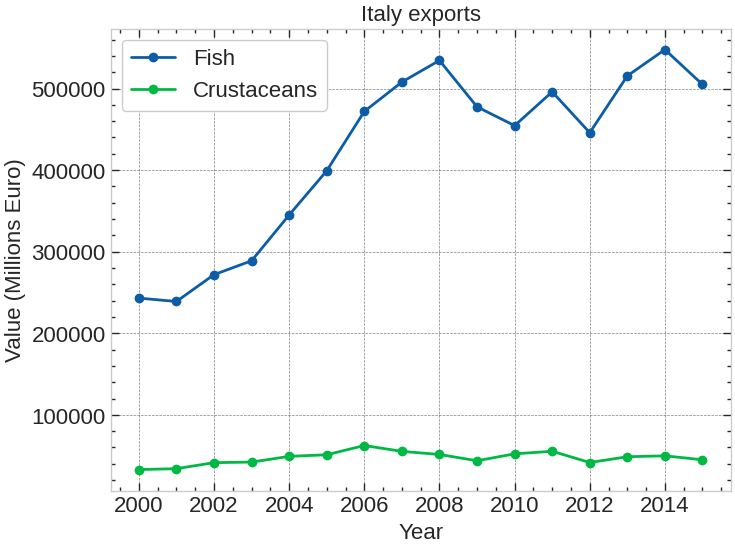

In [48]:
plt.title('Italy exports')
plt.xlabel('Year')
plt.ylabel('Value (Millions Euro)')
plt.plot(years,exp_fish, 'o-', label='Fish')
plt.plot(years,exp_crustaceans, 'o-', label='Crustaceans')
plt.legend()

# ORA PROVA TU
Plotta l'export di Pesci e Crostacei per la Francia e la Spagna

Voglio ora plottare l'export dei Pesci per tutti i paesi dell' UE

In [49]:
export_value

Land Area Trade flow    Commodity     2000     2001     2002  \
0           Albania     Export  Crustaceans       29      354       20   
1           Albania     Export         Fish     4387     5990     8329   
2           Albania     Import  Crustaceans       15       13       19   
3           Albania     Import         Fish     4075     5173     9605   
4           Andorra     Export  Crustaceans        0        0        0   
..              ...        ...          ...      ...      ...      ...   
163         Ukraine     Import         Fish   109510    95572    86154   
164  United Kingdom     Export  Crustaceans   343852   334171   366729   
165  United Kingdom     Export         Fish   776742   833689   847804   
166  United Kingdom     Import  Crustaceans   589457   549562   543235   
167  United Kingdom     Import         Fish  1412679  1485684  1571775   

        2003     2004     2005     2006     2007     2008     2009     2010  \
0         58        6        1       32       33        1     1030      554   
1      13379    16896     1631     1671     1809     2254    28967    30514   
2         28       18       78      512      615     1351     1171     1625   
3      11092    13275    14957    15141    15953    22370    24095    22892   
4          0        0        5        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
163   105383   129713   261145   420617   492086   671451   504067   416555   
164   395928   432976   454670   488186   565349   479100   405784   454797   
165  1073843  1141685  1178785  1206945  1351393  1366370  1436082  1630259   
166   624542   662773   689453   699096   732596   697896   686534   730006   
167  1655944  1920262  2252187  2742357  3137610  3260124  2613149  2668313   

        2011     2012     2013     2014     2015  
0        961      829       78      947     1453  
1      31189    31096    34891    32499    33989  
2       2803     2308     1980     3203     3583  
3      25958    22004    27862    28940    30991  
4          1        0        0        0        1  
..       ...      ...      ...      ...      ...  
163   548088   737505   911156   629638   307708  
164   474333   438557   455294   478204   395712  
165  1917637  1758354  1862348  2169639  1666646  
166   900722   876514   975565  1081740  1005438  
167  3040647  3079108  3230800  3171716  2810551  

[168 rows x 19 columns]

In [50]:
fish_filter = export_value['Commodity']=='Fish'
trade_filter = export_value['Trade flow']=='Export'
tot_filter = fish_filter & trade_filter
export_value_fish = export_value[tot_filter]

In [52]:
export_value_fish

Land Area Trade flow Commodity     2000     2001     2002  \
1                     Albania     Export      Fish     4387     5990     8329   
5                     Andorra     Export      Fish        0        0        0   
9                     Austria     Export      Fish     7836     6533    17916   
13                    Belarus     Export      Fish    13956    13502    18787   
17                    Belgium     Export      Fish   242944   299381   314392   
21     Bosnia and Herzegovina     Export      Fish       47       17      141   
25                   Bulgaria     Export      Fish     1544     2372     2597   
29                    Croatia     Export      Fish    41609    61202    76660   
33                    Czechia     Export      Fish    25329    30426    35129   
37                    Denmark     Export      Fish  2002252  1942854  2052010   
41                    Estonia     Export      Fish    63225   121724   123494   
45              Faroe Islands     Export      Fish   364085   421056   455843   
49                    Finland     Export      Fish    16373    13913    13829   
53                     France     Export      Fish   780992   694851   761361   
57                    Germany     Export      Fish   892748   830892   903388   
61                     Greece     Export      Fish   200480   180451   191253   
65                    Hungary     Export      Fish     4337     4076     3096   
69                    Iceland     Export      Fish   935752   943492  1023660   
73                    Ireland     Export      Fish   205025   270099   274955   
77                      Italy     Export      Fish   243086   238942   271841   
81                     Latvia     Export      Fish    47569   102343   117594   
85                  Lithuania     Export      Fish    33129    56368    73727   
89                 Luxembourg     Export      Fish    14076    11352    18949   
93   Macedonia, Fmr Yug Rp of     Export      Fish       77       57       27   
97                      Malta     Export      Fish     7708    13174    40925   
101      Moldova, Republic of     Export      Fish        5        9      440   
105                Montenegro     Export      Fish        0        0        0   
109               Netherlands     Export      Fish   875160   887318  1235650   
113                    Norway     Export      Fish  3259537  3133741  3301445   
117                    Poland     Export      Fish   212955   218837   222241   
121                  Portugal     Export      Fish   209755   204437   227839   
125                   Romania     Export      Fish     2270     1741     1654   
129        Russian Federation     Export      Fish  1224218  1275407  1129435   
133                    Serbia     Export      Fish        0        0        0   
137     Serbia and Montenegro     Export      Fish      204      273      301   
141                  Slovakia     Export      Fish     1764     1630     2317   
145                  Slovenia     Export      Fish     5563     5257     5878   
149                     Spain     Export      Fish  1133729  1275677  1298699   
153                    Sweden     Export      Fish   435532   435338   489343   
157               Switzerland     Export      Fish     2208     2018     2555   
161                   Ukraine     Export      Fish    39491    24444    18928   
165            United Kingdom     Export      Fish   776742   833689   847804   

        2003     2004     2005     2006     2007     2008     2009     2010  \
1      13379    16896     1631     1671     1809     2254    28967    30514   
5          1        0       46        0        0        1       24        0   
9      30934    41967    17220    13895    22031    31093    36878    45112   
13     35889    47895    56391    79645   102909   133629    92257   104574   
17    408044   452097   481364   524042   549087   585109   518884   532371   
21      1080     4326     5341     7046     7566     9826    1

Voglio plottare i primi 10 esportatori

Come faccio a selezionarli? Devo individuare un criterio. Considero prima l'esportazione media tra il 2000 e il 2015 e poi seleziono i primi 10 paesi con esportazione media più alta


In [53]:
export_value_fish['Mean']=export_value_fish.iloc[:, 3:].mean(axis=1)

/tmp/ipykernel_9632/1135689799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  export_value_fish['Mean']=export_value_fish.iloc[:, 3:].mean(axis=1)


In [54]:
export_value_fish

Land Area Trade flow Commodity     2000     2001     2002  \
1                     Albania     Export      Fish     4387     5990     8329   
5                     Andorra     Export      Fish        0        0        0   
9                     Austria     Export      Fish     7836     6533    17916   
13                    Belarus     Export      Fish    13956    13502    18787   
17                    Belgium     Export      Fish   242944   299381   314392   
21     Bosnia and Herzegovina     Export      Fish       47       17      141   
25                   Bulgaria     Export      Fish     1544     2372     2597   
29                    Croatia     Export      Fish    41609    61202    76660   
33                    Czechia     Export      Fish    25329    30426    35129   
37                    Denmark     Export      Fish  2002252  1942854  2052010   
41                    Estonia     Export      Fish    63225   121724   123494   
45              Faroe Islands     Export      Fish   364085   421056   455843   
49                    Finland     Export      Fish    16373    13913    13829   
53                     France     Export      Fish   780992   694851   761361   
57                    Germany     Export      Fish   892748   830892   903388   
61                     Greece     Export      Fish   200480   180451   191253   
65                    Hungary     Export      Fish     4337     4076     3096   
69                    Iceland     Export      Fish   935752   943492  1023660   
73                    Ireland     Export      Fish   205025   270099   274955   
77                      Italy     Export      Fish   243086   238942   271841   
81                     Latvia     Export      Fish    47569   102343   117594   
85                  Lithuania     Export      Fish    33129    56368    73727   
89                 Luxembourg     Export      Fish    14076    11352    18949   
93   Macedonia, Fmr Yug Rp of     Export      Fish       77       57       27   
97                      Malta     Export      Fish     7708    13174    40925   
101      Moldova, Republic of     Export      Fish        5        9      440   
105                Montenegro     Export      Fish        0        0        0   
109               Netherlands     Export      Fish   875160   887318  1235650   
113                    Norway     Export      Fish  3259537  3133741  3301445   
117                    Poland     Export      Fish   212955   218837   222241   
121                  Portugal     Export      Fish   209755   204437   227839   
125                   Romania     Export      Fish     2270     1741     1654   
129        Russian Federation     Export      Fish  1224218  1275407  1129435   
133                    Serbia     Export      Fish        0        0        0   
137     Serbia and Montenegro     Export      Fish      204      273      301   
141                  Slovakia     Export      Fish     1764     1630     2317   
145                  Slovenia     Export      Fish     5563     5257     5878   
149                     Spain     Export      Fish  1133729  1275677  1298699   
153                    Sweden     Export      Fish   435532   435338   489343   
157               Switzerland     Export      Fish     2208     2018     2555   
161                   Ukraine     Export      Fish    39491    24444    18928   
165            United Kingdom     Export      Fish   776742   833689   847804   

        2003     2004     2005     2006     2007     2008     2009     2010  \
1      13379    16896     1631     1671     1809     2254    28967    30514   
5          1        0       46        0        0        1       24        0   
9      30934    41967    17220    13895    22031    31093    36878    45112   
13     35889    47895    56391    79645   102909   133629    92257   104574   
17    408044   452097   481364   524042   549087   585109   518884   532371   
21      1080     4326     5341     7046     7566     9826    1

In [55]:
exp_sor = export_value_fish.sort_values('Mean', ascending=False)

In [56]:
exp_sor

Land Area Trade flow Commodity     2000     2001     2002  \
113                    Norway     Export      Fish  3259537  3133741  3301445   
37                    Denmark     Export      Fish  2002252  1942854  2052010   
149                     Spain     Export      Fish  1133729  1275677  1298699   
129        Russian Federation     Export      Fish  1224218  1275407  1129435   
109               Netherlands     Export      Fish   875160   887318  1235650   
153                    Sweden     Export      Fish   435532   435338   489343   
57                    Germany     Export      Fish   892748   830892   903388   
69                    Iceland     Export      Fish   935752   943492  1023660   
165            United Kingdom     Export      Fish   776742   833689   847804   
53                     France     Export      Fish   780992   694851   761361   
117                    Poland     Export      Fish   212955   218837   222241   
45              Faroe Islands     Export      Fish   364085   421056   455843   
121                  Portugal     Export      Fish   209755   204437   227839   
61                     Greece     Export      Fish   200480   180451   191253   
17                    Belgium     Export      Fish   242944   299381   314392   
77                      Italy     Export      Fish   243086   238942   271841   
73                    Ireland     Export      Fish   205025   270099   274955   
85                  Lithuania     Export      Fish    33129    56368    73727   
81                     Latvia     Export      Fish    47569   102343   117594   
41                    Estonia     Export      Fish    63225   121724   123494   
29                    Croatia     Export      Fish    41609    61202    76660   
13                    Belarus     Export      Fish    13956    13502    18787   
33                    Czechia     Export      Fish    25329    30426    35129   
97                      Malta     Export      Fish     7708    13174    40925   
9                     Austria     Export      Fish     7836     6533    17916   
161                   Ukraine     Export      Fish    39491    24444    18928   
49                    Finland     Export      Fish    16373    13913    13829   
1                     Albania     Export      Fish     4387     5990     8329   
145                  Slovenia     Export      Fish     5563     5257     5878   
89                 Luxembourg     Export      Fish    14076    11352    18949   
25                   Bulgaria     Export      Fish     1544     2372     2597   
65                    Hungary     Export      Fish     4337     4076     3096   
141                  Slovakia     Export      Fish     1764     1630     2317   
21     Bosnia and Herzegovina     Export      Fish       47       17      141   
125                   Romania     Export      Fish     2270     1741     1654   
157               Switzerland     Export      Fish     2208     2018     2555   
133                    Serbia     Export      Fish        0        0        0   
93   Macedonia, Fmr Yug Rp of     Export      Fish       77       57       27   
105                Montenegro     Export      Fish        0        0        0   
137     Serbia and Montenegro     Export      Fish      204      273      301   
101      Moldova, Republic of     Export      Fish        5        9      440   
5                     Andorra     Export      Fish        0        0        0   

        2003     2004     2005     2006     2007     2008     2009     2010  \
113  3364762  3860791  4614956  5230820  5928749  6556499  6783816  8508859   
37   2336661  2501106  2531540  2685785  2854955  3162800  2757270  2840025   
149  1494686  1773896  1842333  2037985  2266045  2500662  2226990  2321330   
129  1176792  1294713  1676403  1840524  1975730  2228682  1965404  2467495   
109  1442153  1629313  1990523  1871261  2221352  2304466  2028186  2040758   
153   661388   863828  1121419  1500659  1586113  1825092  197

In [57]:
exp_sor_final = exp_sor.iloc[0:10,:]
exp_sor_final

Land Area Trade flow Commodity     2000     2001     2002  \
113              Norway     Export      Fish  3259537  3133741  3301445   
37              Denmark     Export      Fish  2002252  1942854  2052010   
149               Spain     Export      Fish  1133729  1275677  1298699   
129  Russian Federation     Export      Fish  1224218  1275407  1129435   
109         Netherlands     Export      Fish   875160   887318  1235650   
153              Sweden     Export      Fish   435532   435338   489343   
57              Germany     Export      Fish   892748   830892   903388   
69              Iceland     Export      Fish   935752   943492  1023660   
165      United Kingdom     Export      Fish   776742   833689   847804   
53               France     Export      Fish   780992   694851   761361   

        2003     2004     2005     2006     2007     2008     2009     2010  \
113  3364762  3860791  4614956  5230820  5928749  6556499  6783816  8508859   
37   2336661  2501106  2531540  2685785  2854955  3162800  2757270  2840025   
149  1494686  1773896  1842333  2037985  2266045  2500662  2226990  2321330   
129  1176792  1294713  1676403  1840524  1975730  2228682  1965404  2467495   
109  1442153  1629313  1990523  1871261  2221352  2304466  2028186  2040758   
153   661388   863828  1121419  1500659  1586113  1825092  1976470  2597908   
57    994055  1107379  1156955  1406447  1769671  1992435  1828181  1912990   
69   1102344  1356106  1456642  1503045  1675991  1684827  1405002  1526629   
165  1073843  1141685  1178785  1206945  1351393  1366370  1436082  1630259   
53    893129  1032522  1095758  1135075  1303925  1413132  1087888  1047725   

        2011     2012      2013      2014     2015          Mean  
113  9102041  8585265  10101144  10502451  8823532  6.353650e+06  
37   3038028  2735199   3129324   3211402  2821984  2.662700e+06  
149  2982501  2787130   2816567   2767891  2463542  2.124354e+06  
129  2860210  2827770   3088185   3104594  2940880  2.067278e+06  
109  2289045  2269398   2366386   2721255  2515351  1.917973e+06  
153  2787913  2816902   3517625   3811066  3623920  1.878157e+06  
57   2281909  2097919   2260878   2511474  2174541  1.632616e+06  
69   1827186  1781483   1834026   1792460  1613157  1.466363e+06  
165  1917637  1758354   1862348   2169639  1666646  1.388639e+06  
53   1142619  1191710   1249733   1128060  1019205  1.061105e+06

Come li plotto? Vediamo il primo

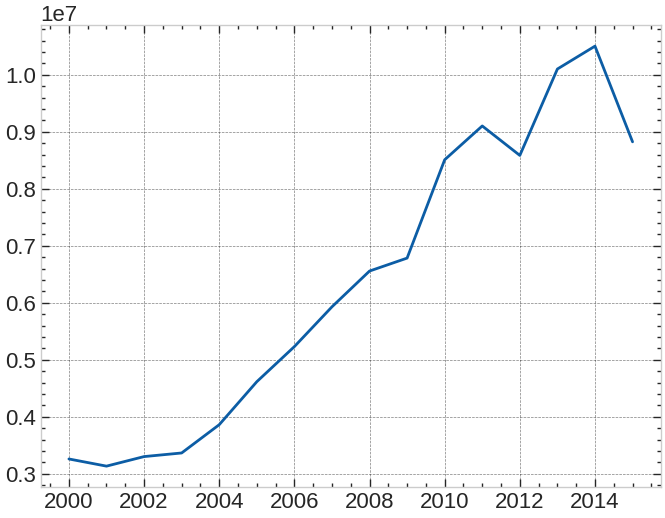

In [58]:
plt.plot(years,exp_sor_final.iloc[0,3:19])

Voglio plottarli tutti

In [59]:
countries = exp_sor_final['Land Area'].values
countries

array(['Norway', 'Denmark', 'Spain', 'Russian Federation', 'Netherlands',
       'Sweden', 'Germany', 'Iceland', 'United Kingdom', 'France'],
      dtype=object)

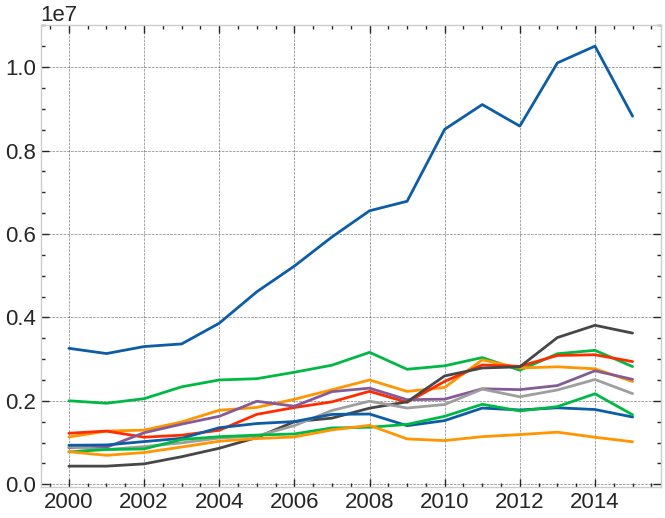

In [60]:
index = 0
for i in countries:
    plt.plot(years,exp_sor_final.iloc[index,3:19])
    index += 1

Cerchiamo di essere un po' più eleganti

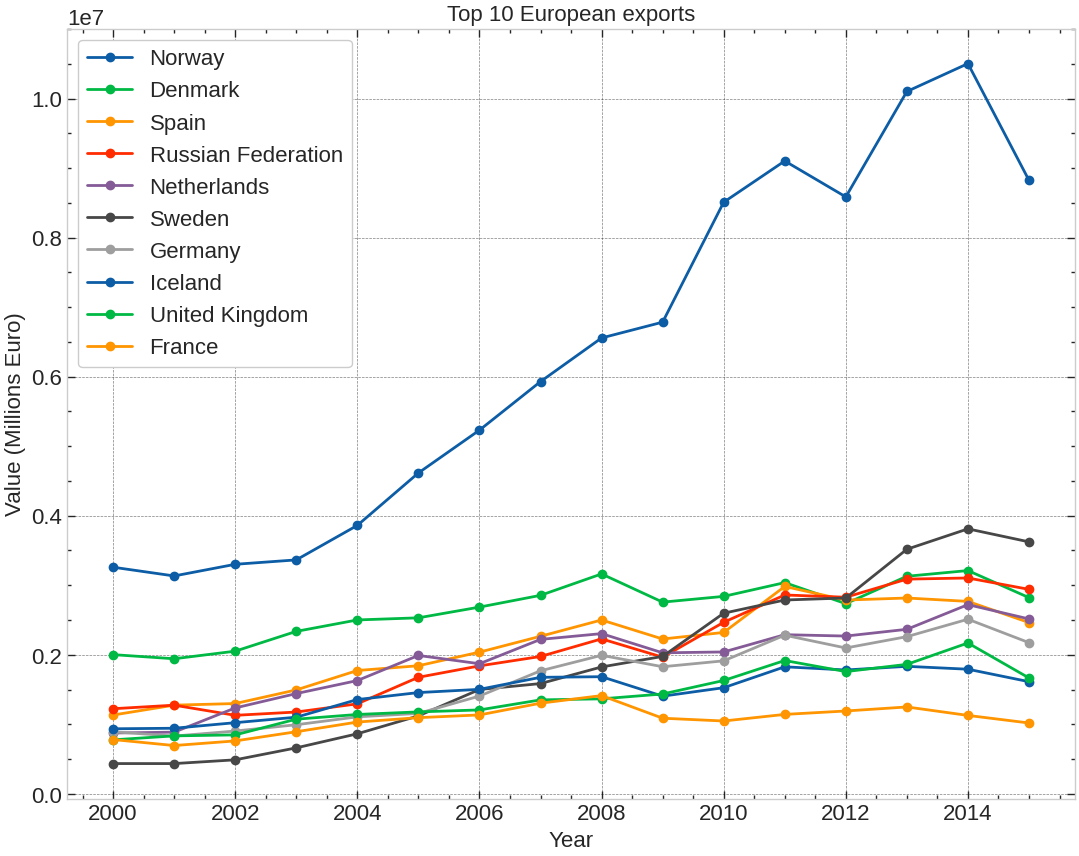

In [61]:
plt.figure(figsize=(13,10))
index = 0
for i in countries:
    plt.plot(years,exp_sor_final.iloc[index,3:19], 'o-', label=i)
    index += 1
plt.title('Top 10 European exports')
plt.xlabel('Year')
plt.ylabel('Value (Millions Euro)')
plt.legend()

# ORA PROVA TU
Plotta l'andamento dei 10 principali consumatori di crostacei in Europa

# SCATTER PLOT

Un altro tipo di grafico comunemente usato è lo SCATTER PLOT. Invece di punti uniti da segmenti di linea, qui i punti sono rappresentati individualmente con un punto, un cerchio o un'altra forma.

# SCATTER PLOT CON ``plt.plot``

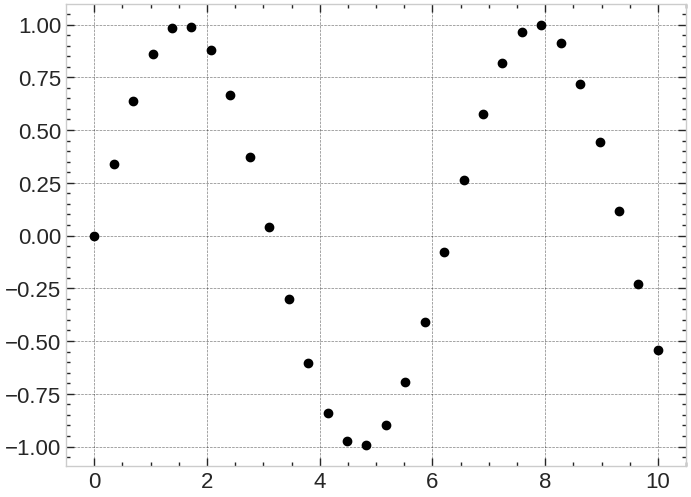

In [62]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Vediamo i possibili marker

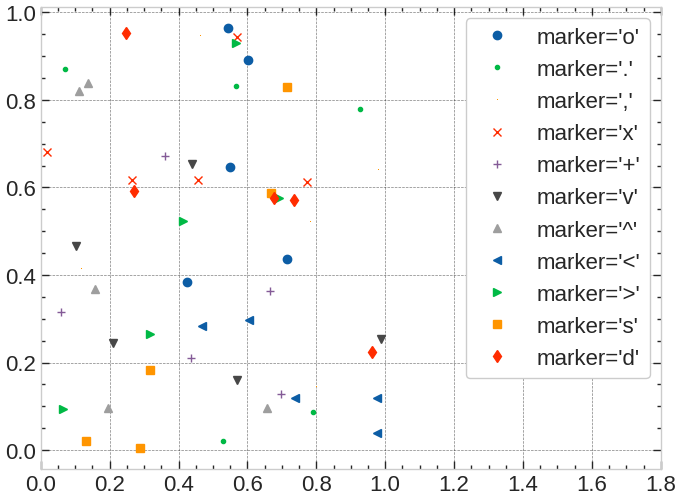

In [63]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Vediamo ulteriori comandi

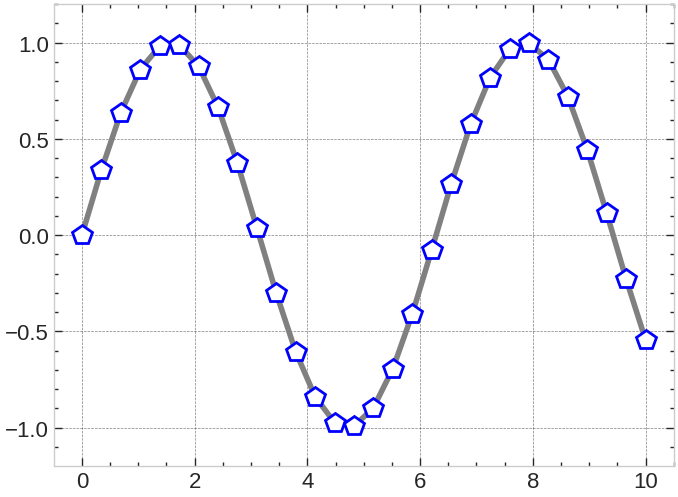

In [64]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='blue',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots con ``plt.scatter``

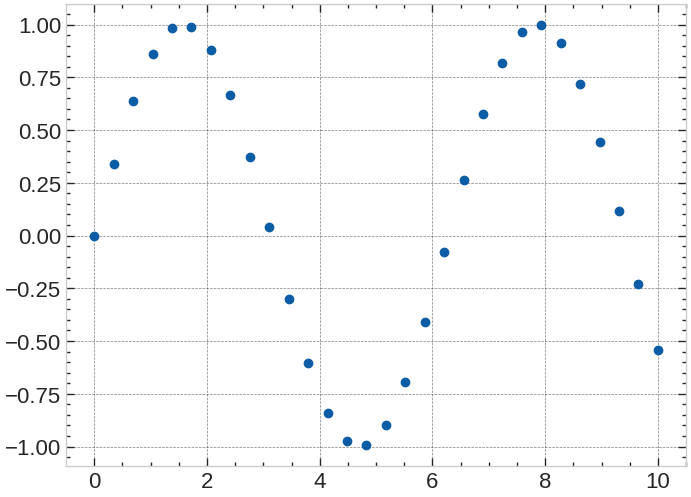

In [65]:
plt.scatter(x, y, marker='o');

La differenza principale tra ``plt.scatter`` e ``plt.plot`` è che il primo può essere utilizzato per creare scatter plot in cui le proprietà di ogni singolo punto (dimensione, colore della faccia, colore del bordo, ecc.) possono essere controllati individualmente o mappati ai dati.

Vediamo un esempio
Per vedere meglio i risultati sovrapposti, useremo anche la parola chiave ``alpha`` per regolare il livello di trasparenza:

In [182]:
rng.randn(100)

array([0.7307091 , 0.88172021, 0.2724369 , 0.3790569 , 0.37429618,
       0.74878826, 0.23780724, 0.1718531 , 0.44929165, 0.30446841,
       0.83918912, 0.23774183, 0.50238946, 0.9425836 , 0.6339977 ,
       0.86728941, 0.94020969, 0.75076486, 0.69957506, 0.96796557,
       0.99440079, 0.45182168, 0.07086978, 0.29279403, 0.15235471,
       0.41748637, 0.13128933, 0.6041178 , 0.38280806, 0.89538588,
       0.96779467, 0.5468849 , 0.27482357, 0.59223042, 0.89676116,
       0.40673335, 0.55207828, 0.27165277, 0.45544415, 0.40171354,
       0.24841347, 0.50586638, 0.31038083, 0.37303486, 0.52497044,
       0.75059502, 0.33350747, 0.92415877, 0.86231855, 0.0486903 ,
       0.25364252, 0.44613551, 0.10462789, 0.34847599, 0.74009753,
       0.68051448, 0.62238443, 0.7105284 , 0.20492369, 0.34169811,
       0.67624248, 0.87923476, 0.54367805, 0.28269965, 0.03023526,
       0.71033683, 0.0078841 , 0.37267907, 0.53053721, 0.92211146,
       0.08949455, 0.40594232, 0.0243132 , 0.34261098, 0.62223

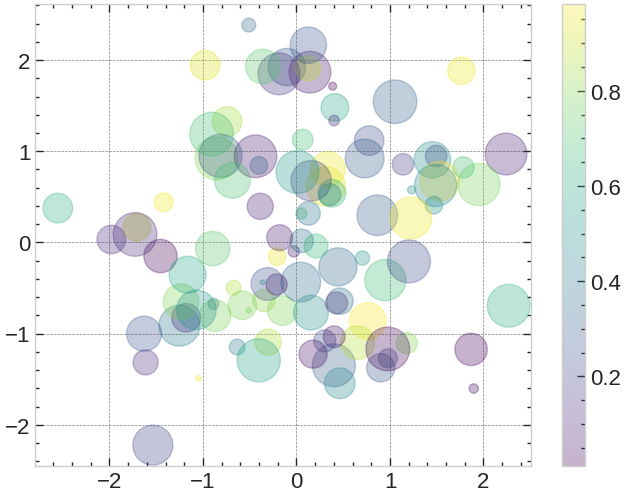

In [66]:
rng = np.random.RandomState(0)
x = rng.randn(100) # genero 100 numeri random tra -1 e 1
y = rng.randn(100)
colors = rng.rand(100) # genero 100 numeri random tra 0 e 1
sizes = 1000 * rng.rand(100) # genero 100 numeri random tra 0 e 1000

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Si noti che l'argomento color è automaticamente mappato su una scala di colori (mostrata qui dal comando ``colorbar()``), e che l'argomento size è dato in pixel.
In questo modo, il colore e la dimensione dei punti possono essere utilizzati per trasmettere informazioni nella visualizzazione, al fine di visualizzare dati multidimensionali.

Ad esempio, potremmo utilizzare i dati dell'iris di Scikit-Learn, in cui ogni campione è uno dei tre tipi di fiori di cui è stata misurata attentamente la dimensione dei petali e dei sepali:

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

# Crea un DataFrame con i dati e le etichette del target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
# Aggiungi una colonna "species" che mappa i numeri di target alle rispettive specie
df['species'] = df['target'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})
# Rimuovi la colonna target, che non è necessaria
df = df.drop('target', axis=1)

# Visualizza il DataFrame
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [80]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

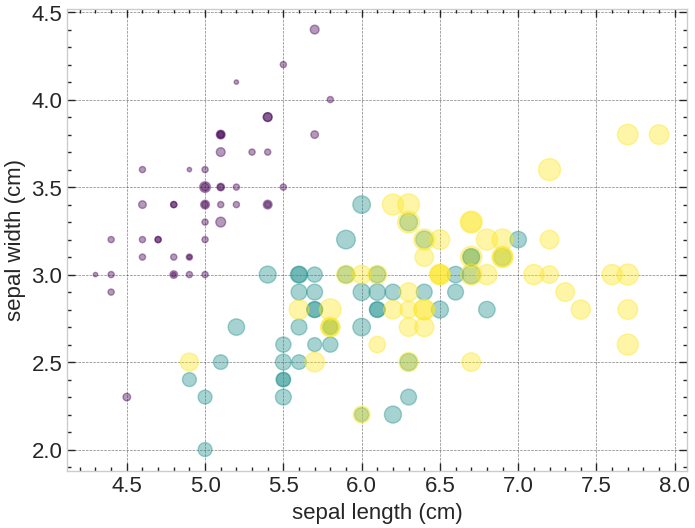

In [69]:
plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [70]:
export_value

Land Area Trade flow    Commodity     2000     2001     2002  \
0           Albania     Export  Crustaceans       29      354       20   
1           Albania     Export         Fish     4387     5990     8329   
2           Albania     Import  Crustaceans       15       13       19   
3           Albania     Import         Fish     4075     5173     9605   
4           Andorra     Export  Crustaceans        0        0        0   
..              ...        ...          ...      ...      ...      ...   
163         Ukraine     Import         Fish   109510    95572    86154   
164  United Kingdom     Export  Crustaceans   343852   334171   366729   
165  United Kingdom     Export         Fish   776742   833689   847804   
166  United Kingdom     Import  Crustaceans   589457   549562   543235   
167  United Kingdom     Import         Fish  1412679  1485684  1571775   

        2003     2004     2005     2006     2007     2008     2009     2010  \
0         58        6        1       32       33        1     1030      554   
1      13379    16896     1631     1671     1809     2254    28967    30514   
2         28       18       78      512      615     1351     1171     1625   
3      11092    13275    14957    15141    15953    22370    24095    22892   
4          0        0        5        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
163   105383   129713   261145   420617   492086   671451   504067   416555   
164   395928   432976   454670   488186   565349   479100   405784   454797   
165  1073843  1141685  1178785  1206945  1351393  1366370  1436082  1630259   
166   624542   662773   689453   699096   732596   697896   686534   730006   
167  1655944  1920262  2252187  2742357  3137610  3260124  2613149  2668313   

        2011     2012     2013     2014     2015  
0        961      829       78      947     1453  
1      31189    31096    34891    32499    33989  
2       2803     2308     1980     3203     3583  
3      25958    22004    27862    28940    30991  
4          1        0        0        0        1  
..       ...      ...      ...      ...      ...  
163   548088   737505   911156   629638   307708  
164   474333   438557   455294   478204   395712  
165  1917637  1758354  1862348  2169639  1666646  
166   900722   876514   975565  1081740  1005438  
167  3040647  3079108  3230800  3171716  2810551  

[168 rows x 19 columns]

ESERCIZIO: Voglio capire se esistono gruppi di nazioni che hanno lo stesso bilancio import-export di pesce

In [76]:
fish_filter = export_value['Commodity']=='Fish'
export = export_value[fish_filter]
export

Land Area Trade flow Commodity     2000     2001     2002     2003  \
1           Albania     Export      Fish     4387     5990     8329    13379   
3           Albania     Import      Fish     4075     5173     9605    11092   
5           Andorra     Export      Fish        0        0        0        1   
7           Andorra     Import      Fish     7517     8426     9834    12113   
9           Austria     Export      Fish     7836     6533    17916    30934   
..              ...        ...       ...      ...      ...      ...      ...   
159     Switzerland     Import      Fish   260983   265841   269776   298409   
161         Ukraine     Export      Fish    39491    24444    18928    14635   
163         Ukraine     Import      Fish   109510    95572    86154   105383   
165  United Kingdom     Export      Fish   776742   833689   847804  1073843   
167  United Kingdom     Import      Fish  1412679  1485684  1571775  1655944   

        2004     2005     2006     2007     2008     2009     2010     2011  \
1      16896     1631     1671     1809     2254    28967    30514    31189   
3      13275    14957    15141    15953    22370    24095    22892    25958   
5          0       46        0        0        1       24        0       20   
7      14034    15647    15438    16147    15244    13199    12831    13905   
9      41967    17220    13895    22031    31093    36878    45112    67647   
..       ...      ...      ...      ...      ...      ...      ...      ...   
159   334144   350584   391040   432531   475974   462239   487809   552066   
161    15416    19867    17935    28451    35594    57989    52626    58206   
163   129713   261145   420617   492086   671451   504067   416555   548088   
165  1141685  1178785  1206945  1351393  1366370  1436082  1630259  1917637   
167  1920262  2252187  2742357  3137610  3260124  2613149  2668313  3040647   

        2012     2013     2014     2015  
1      31096    34891    32499    33989  
3      22004    27862    28940    30991  
5          3        4        0        7  
7      12650    13450    14008    12721  
9      77492    80955    75330    64929  
..       ...      ...      ...      ...  
159   531726   610336   605934   557779  
161    64620    62652    46950    16223  
163   737505   911156   629638   307708  
165  1758354  1862348  2169639  1666646  
167  3079108  3230800  3171716  2810551  

[84 rows x 19 columns]

Mi interessa l'anno 2015

In [87]:
export = export[['Land Area','Trade flow','2015']]
export

Land Area Trade flow     2015
1           Albania     Export    33989
3           Albania     Import    30991
5           Andorra     Export        7
7           Andorra     Import    12721
9           Austria     Export    64929
..              ...        ...      ...
159     Switzerland     Import   557779
161         Ukraine     Export    16223
163         Ukraine     Import   307708
165  United Kingdom     Export  1666646
167  United Kingdom     Import  2810551

[84 rows x 3 columns]

Provo a ricostruire le colonne per avere qualcosa di più comodo

In [100]:
col_export=export[export['Trade flow']=='Export']['2015'].values
col_import=export[export['Trade flow']=='Import']['2015'].values
col_land = export['Land Area'].unique()

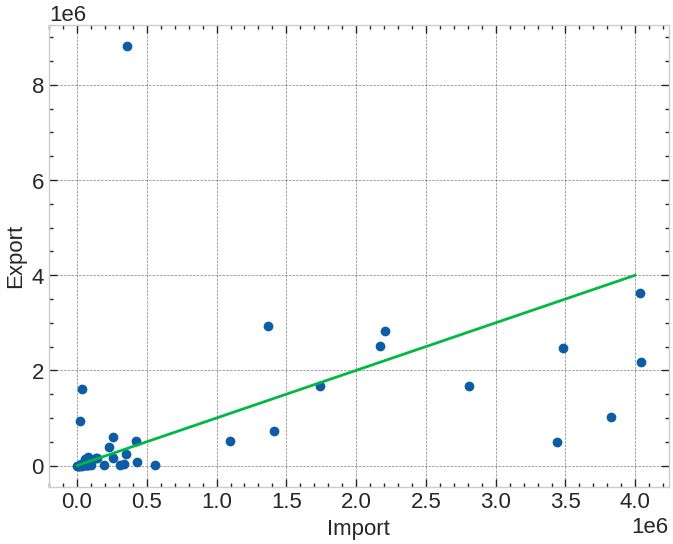

In [124]:
#plt.scatter(col_import, col_export, alpha=0.4,cmap='viridis')
plt.plot(col_import,col_export, 'o')
plt.xlabel('Import')
plt.ylabel('Export');
plt.plot(np.array([0,4000000]), np.array([0,4000000]))

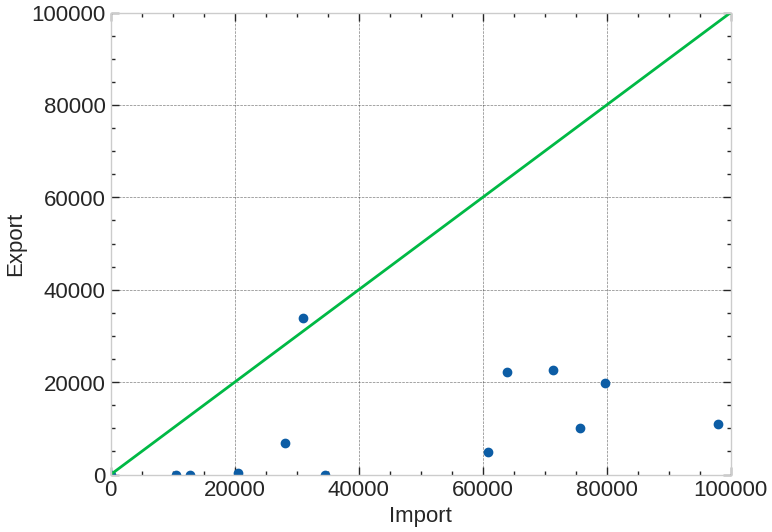

In [129]:
plt.plot(col_import,col_export, 'o')
plt.xlabel('Import')
plt.ylabel('Export');
plt.xlim(0,100000)
plt.ylim(0,100000)
plt.plot(np.array([0,400000]), np.array([0,400000]))

# Three-Dimensional Plotting in Matplotlib

Matplotlib è stato inizialmente progettato pensando solo alla stampa bidimensionale.
I grafici tridimensionali sono abilitati importando il toolkit ``mplot3d``, incluso con l'installazione principale di Matplotlib:

In [206]:
from mpl_toolkits import mplot3d

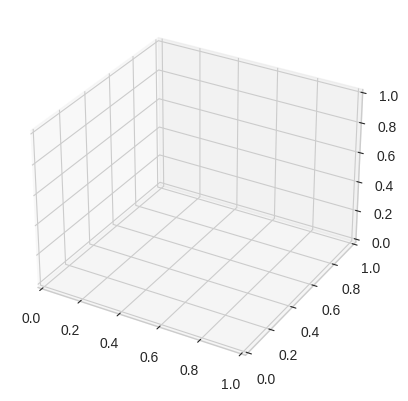

In [207]:
fig = plt.figure()
ax = plt.axes(projection='3d')

## Punti e linee tridimensionali

Il grafico tridimensionale più elementare è una linea o una raccolta di scatter plot creata da insiemi di triple (x, y, z).
In analogia con i più comuni grafici bidimensionali discussi in precedenza, questi possono essere creati utilizzando le funzioni ``ax.plot3D`` e ``ax.scatter3D``.

Proviamo a tracciare una spirale trigonometrica, insieme ad alcuni punti disegnati a caso vicino alla linea:

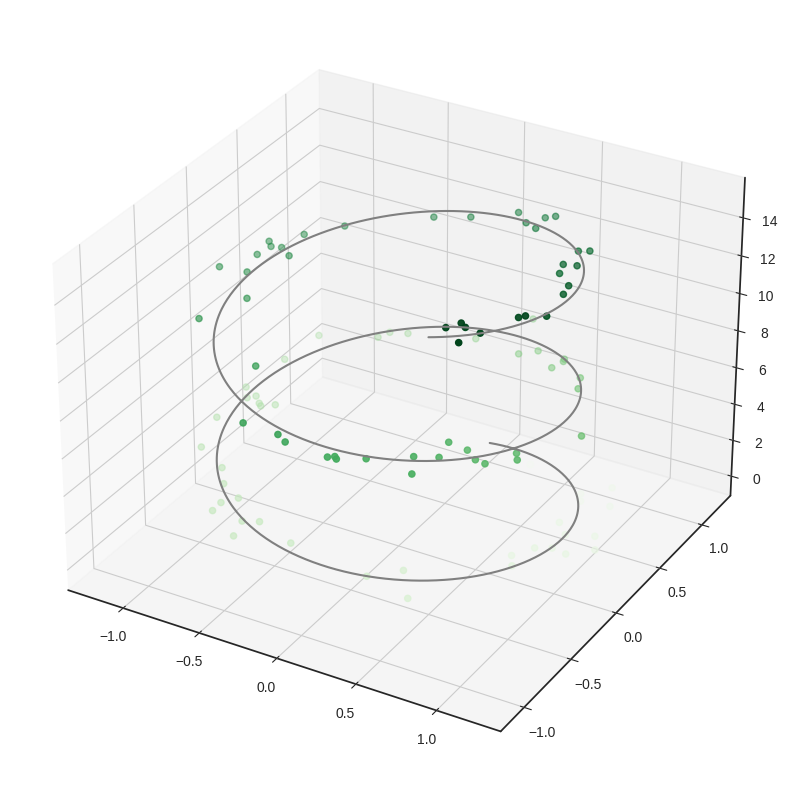

In [31]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Si noti che per impostazione predefinita, i punti di dispersione hanno la loro trasparenza regolata per dare un senso di profondità alla pagina.
Mentre l'effetto tridimensionale a volte è difficile da vedere all'interno di un'immagine statica, una vista interattiva può portare a qualche bella intuizione sulla disposizione dei punti.

In [29]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [234]:
# %matplotlib inline
# %matplotlib notebook


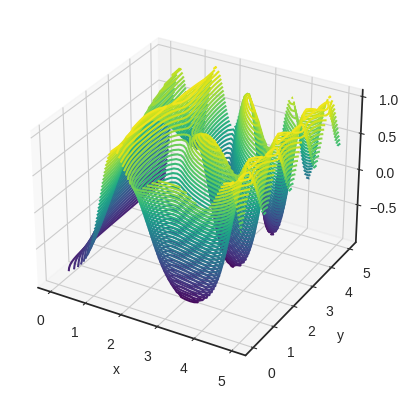

In [71]:
fig = plt.figure()
#plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

A volte l'angolo di visualizzazione predefinito non è ottimale, nel qual caso possiamo utilizzare il metodo view_init per impostare gli angoli di elevazione e azimutale. Nell'esempio seguente, utilizzeremo un'elevazione di 60 gradi (ovvero 60 gradi sopra il piano x-y) e un azimut di 35 gradi (ovvero ruotato di 35 gradi in senso antiorario rispetto all'asse z):

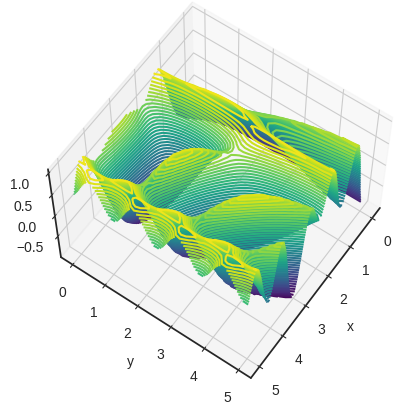

In [72]:
ax.view_init(60, 35)
fig

Ancora una volta, si noti che questo tipo di rotazione può essere realizzato in modo interattivo facendo clic e trascinando quando si utilizza uno dei backend interattivi di Matplotlib.

<Figure size 640x480 with 0 Axes>

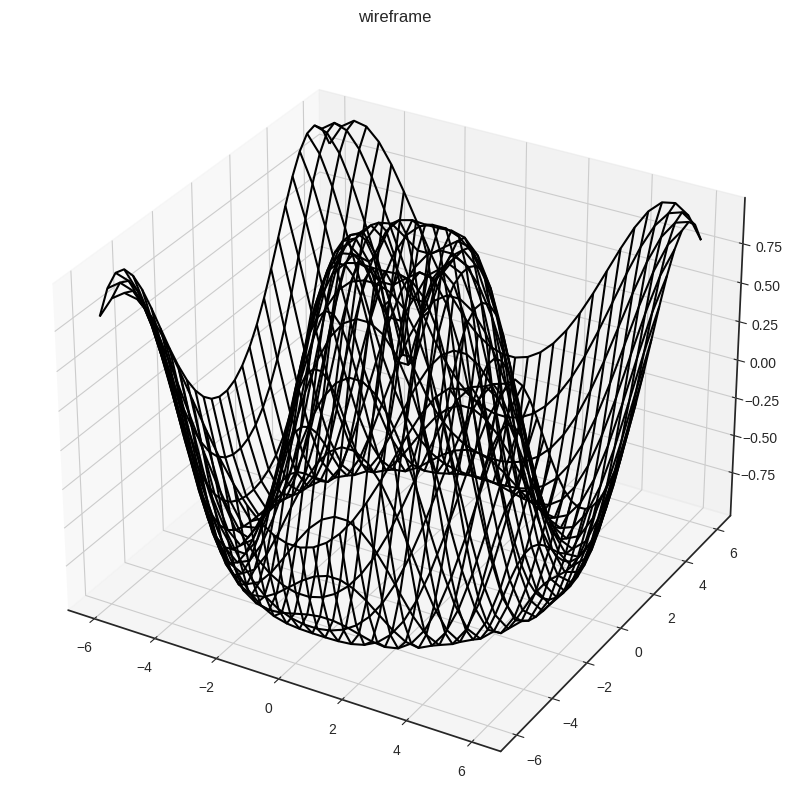

In [45]:

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

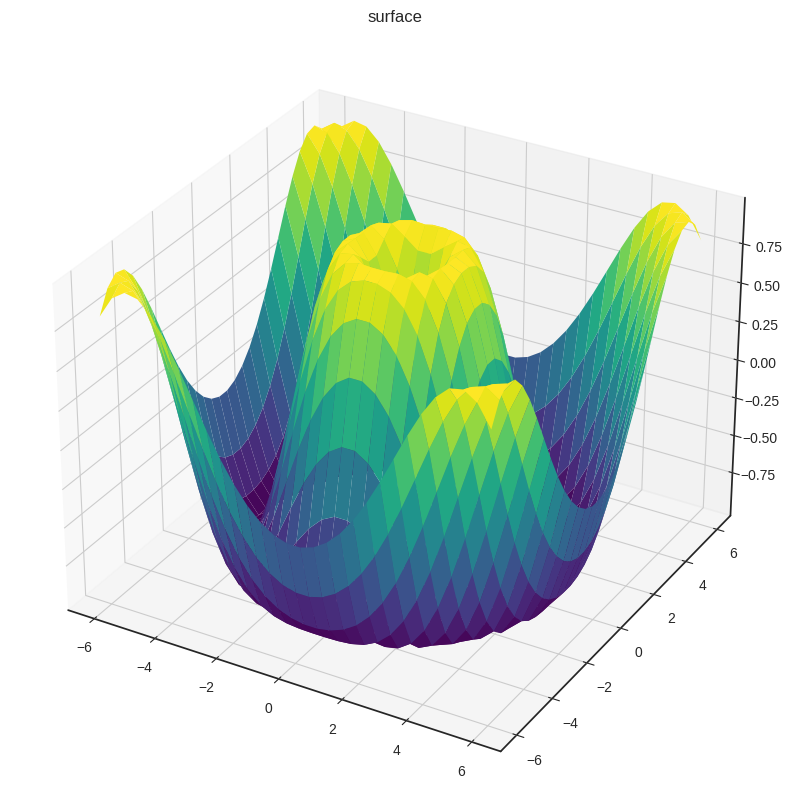

In [46]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [132]:
def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<Figure size 640x480 with 0 Axes>

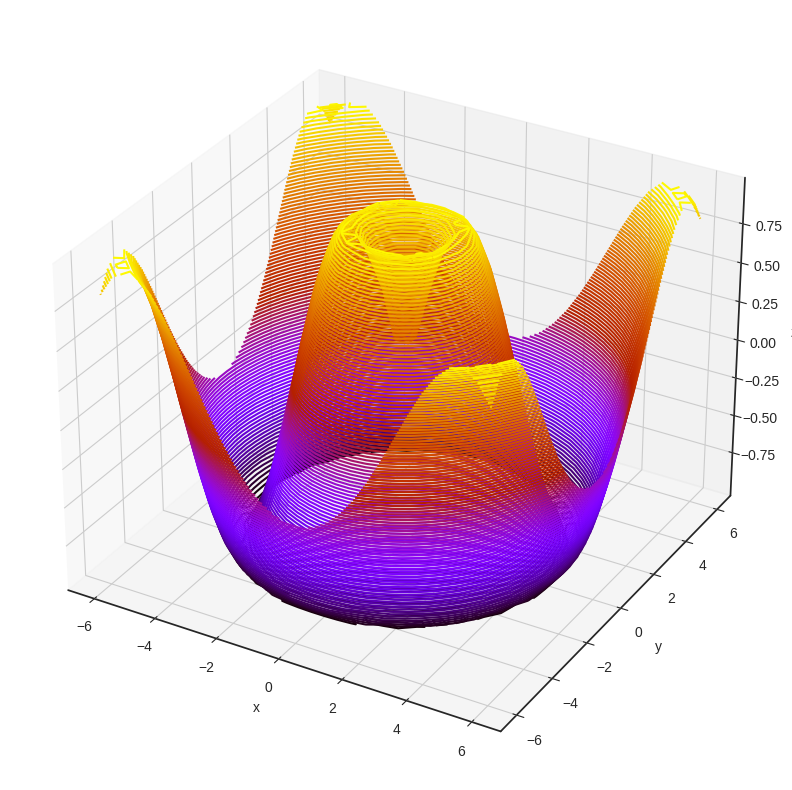

In [47]:
%matplotlib inline

fig = plt.figure()
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='gnuplot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [48]:
ax.view_init(10, 35)
fig

<Figure size 640x480 with 0 Axes>

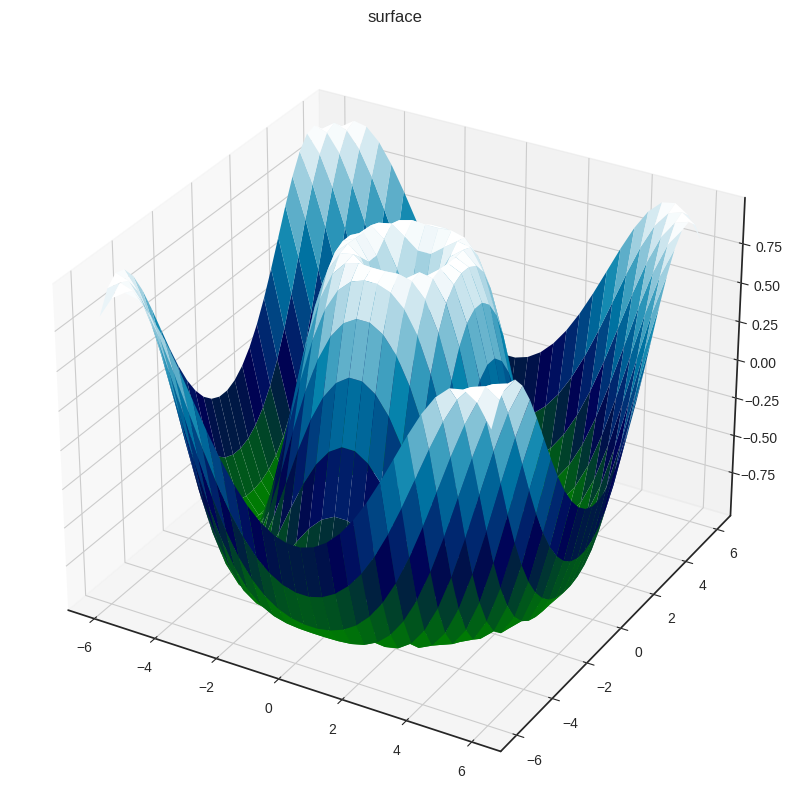

In [49]:
plt.figure(figsize=(10,10))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='ocean', edgecolor='none')
ax.set_title('surface');

# Density and Contour Plots

In [4]:
plt.style.use('seaborn-white')
import numpy as np

/tmp/ipykernel_19751/2599680459.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [52]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [53]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

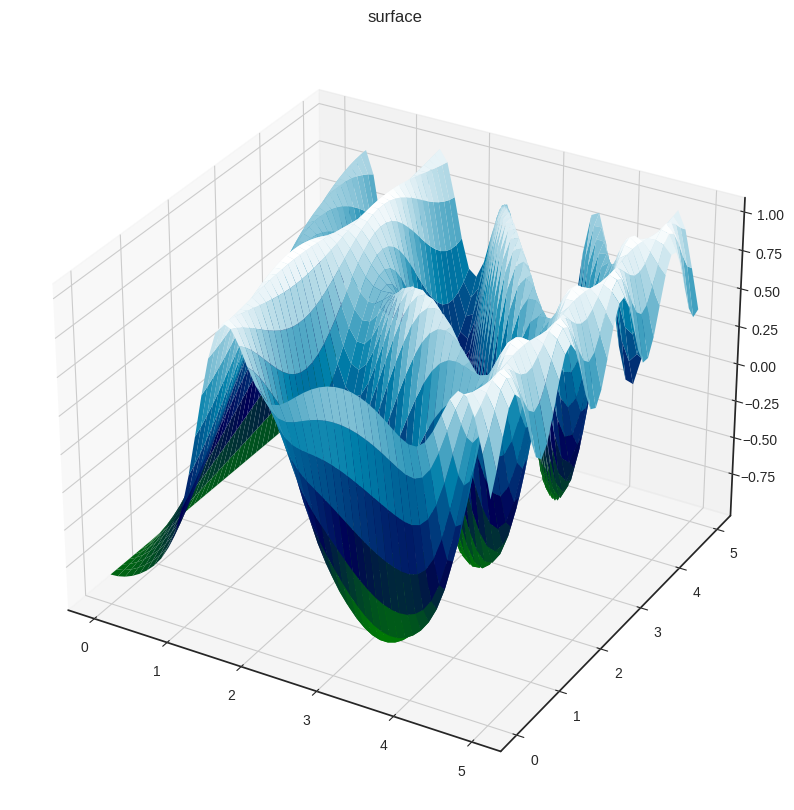

In [60]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='ocean', edgecolor='none')
ax.set_title('surface');

Un contour plot può essere creato con la funzione ``plt.contour``.
Accetta tre argomenti: una griglia di valori *x*, una griglia di valori *y* e una griglia di valori *z*.
I valori *x* e *y* rappresentano le posizioni sul grafico ei valori *z* saranno rappresentati dai livelli di contorno.
Il modo più semplice per preparare tali dati è utilizzare la funzione ``np.meshgrid``, che costruisce griglie bidimensionali da array unidimensionali:

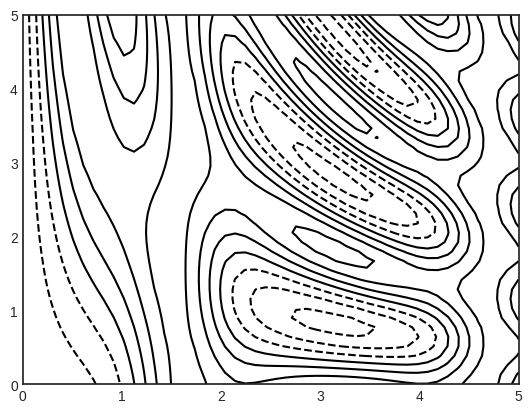

In [61]:
plt.contour(X, Y, Z, colors='black');

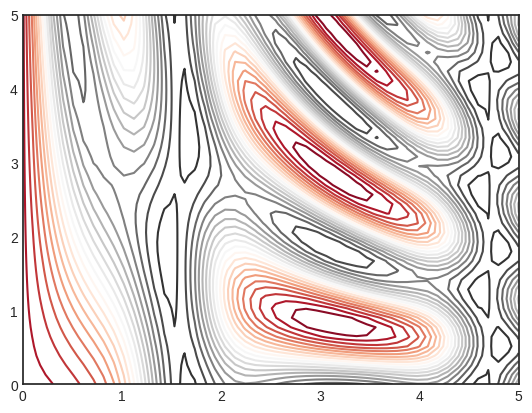

In [62]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

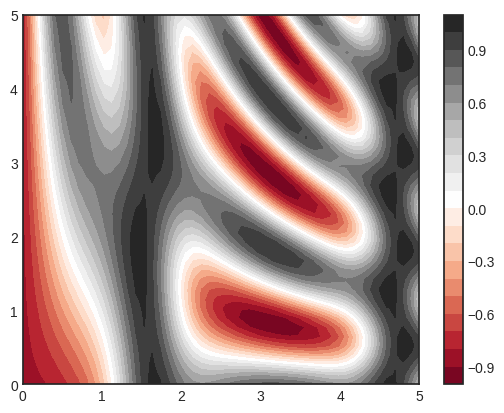

In [63]:

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

La barra dei colori rende chiaro che le regioni nere sono "picchi", mentre le regioni rosse sono "valli".

A volte può essere utile combinare contour plot e grafici di immagini. Ad esempio, qui usiamo un'immagine di sfondo parzialmente trasparente (con la trasparenza impostata tramite il parametro alpha) e sovrascriviamo i contorni con etichette sui contorni stessi (usando la funzione plt.clabel()):

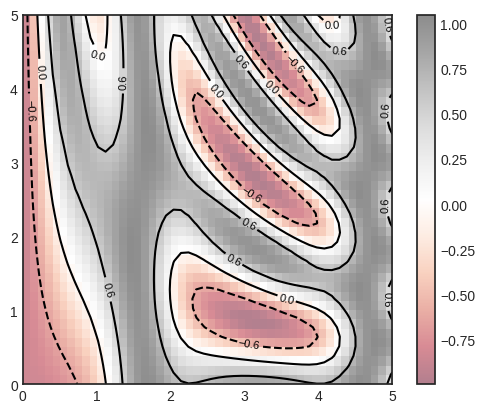

In [65]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();